In [18]:
import pandas as pd
import folium
from geopy.geocoders import Nominatim
import random

# Função para obter as coordenadas a partir do endereço
def obter_coordenadas(endereco):
    geolocator = Nominatim(user_agent="geoapiExercises")
    location = geolocator.geocode(endereco)
    
    if location:
        return location.latitude, location.longitude
    else:
        return None
def calcular_tamanho_circulo(denuncias):
    max_radius = 550
    min_radius = 50
    max_denuncias = contagem.max()
    min_denuncias = contagem.min()

    scaled_radius = min_radius + (max_radius - min_radius) * (denuncias - min_denuncias) / (max_denuncias - min_denuncias)
    return scaled_radius
# Coordenadas de Fernando de Noronha
latitude = -3.84036
longitude = -32.4113

# Cria o mapa
mapa = folium.Map(location=[latitude, longitude], zoom_start=14)


a = pd.read_csv('./registroPernambuco.csv', sep=',')

# Filtrar registros a partir de 2012
a['Data do registro'] = pd.to_datetime(a['Data do registro'], format='%d/%m/%Y')
a = a[a['Data do registro'].dt.year >= 2012]

# Função para criar os círculos para cada localidade
def criar_circulo_localidade(localidade):
    endereco_fernando_noronha = f"{localidade}, Fernando de Noronha, Pernambuco, Brazil"
    endereco_pernambuco = f"{localidade}, Pernambuco, Brazil"

    coords_fernando_noronha = obter_coordenadas(endereco_fernando_noronha)
    coords_pernambuco = obter_coordenadas(endereco_pernambuco)

    if coords_fernando_noronha:
        coords = coords_fernando_noronha
    elif coords_pernambuco:
        coords = coords_pernambuco
    else:
        # Incrementa a contagem de localidades não encontradas
        localidades_nao_encontradas.add(localidade)
        return

    denuncias = a.loc[a['Localidade'] == localidade].shape[0]
    localidades_encontradas.add(localidade)
    denuncias_localidades_encontradas[0] += 1
    denuncias_localidades_encontradas[1] += denuncias
    
    folium.Marker(
    location=[latitude, longitude],
    popup=folium.Popup(f"Fernando de Noronha <br> Localidades não encontradas: {len(localidades_nao_encontradas)};<br>Denúncias das localidades não encontradas: {sum(contagem[list(localidades_nao_encontradas)])};<br>Localidades encontradas: {len(localidades_encontradas)};<br> Denúncias das localidades encontradas: {denuncias_localidades_encontradas[1]}.", max_width=350),
    icon=folium.Icon(color='blue')
     
).add_to(mapa)
    cor_unica = f'#{random.randint(0, 0xFFFFFF):06x}'  
    tamanho_circulo = calcular_tamanho_circulo(denuncias)

    folium.Circle(
        location=coords,
        radius=tamanho_circulo,
        color=cor_unica,
        fill=True,
        fill_color=cor_unica,
        fill_opacity=0.7,
        popup=folium.Popup(f"{localidade}<br>Denúncias:{denuncias}", max_width=430)
    ).add_to(mapa)
    print(f"{localidade} Denúncias:{denuncias}")
    
    
# Conjunto para armazenar as localidades não encontradas
localidades_nao_encontradas = set()

# Conjunto para armazenar as localidades encontradas
localidades_encontradas = set()

# Lista para armazenar o número de localidades encontradas e o número total de denúncias dessas localidades
denuncias_localidades_encontradas = [0, 0]

# Contagem de denúncias por localidade
contagem = a['Localidade'].value_counts()

# Criar os círculos para cada localidade
for localidade in contagem.index:
    criar_circulo_localidade(localidade)
    
print("Localidades não encontradas:")
for localidade in localidades_nao_encontradas:
    denuncias_localidade_nao_encontrada = contagem.get(localidade, 0)
    print(f"{localidade} Denúncias:{denuncias_localidade_nao_encontrada}")


# Exibe o mapa interativo
mapa


Baía do Sueste Denúncias:786
Porto Santo Antonio Denúncias:411
Biboca Denúncias:53
Boldró Denúncias:36
Caieiras Denúncias:25
Sancho Denúncias:22
Baía dos Porcos Denúncias:15
Leão Denúncias:13
Ilha do Meio Denúncias:8
Conceição Denúncias:3
Praia da Atalaia Denúncias:2
Ilha Sela Gineta Denúncias:2
Morro Dois Irmãos Denúncias:2
Morro de Fora Denúncias:1
Ilha São José Denúncias:1
Ilha Rasa Denúncias:1
Pedras Secas Denúncias:1
Localidades não encontradas:
Caverna da Sapata Denúncias:3
Buraco do Inferno Denúncias:16
Canal da Ressureta Denúncias:11
Outras Praias Denúncias:2
Ilha da Rata Denúncias:2
Pontal do Norte Denúncias:1
Buraco da Raquel Denúncias:1
Sem Informações Denúncias:6
Enseada das Cagarras Denúncias:36
Cabras Denúncias:10


In [4]:
import pandas as pd
import plotly.express as px

# Ler o arquivo CSV
a = pd.read_csv('RegistroPernambuco.csv', sep=',')

# Extrair o ano da coluna "Data do registro"
a['Ano'] = pd.to_datetime(a['Data do registro'], format='%d/%m/%Y').dt.year
a['Data do registro'] = pd.to_datetime(a['Data do registro'], format='%d/%m/%Y')
a = a[a['Data do registro'].dt.year >= 2012]
# Agrupar os dados por ano, espécies de tartarugas e "nome comum" e contar o número de denúncias em cada grupo
contagem_por_ano_especie_nome_comum = a.groupby(['Ano', 'Nome cientifico na base de dados', 'Nome comum']).size().reset_index(name='Contagem')

# Criar o gráfico de barras interativo com plotly
fig = px.bar(contagem_por_ano_especie_nome_comum, x='Ano', y='Contagem', color='Nome comum', barmode='group',
             text='Contagem')  # Especificar o texto exato a ser exibido sobre cada barra

# Configurações adicionais do layout do gráfico
fig.update_layout(title='Número de Denúncias por Ano por Espécie de Tartaruga do Estado de Pernambuco de 2012 a 2015',
                  xaxis_title='Ano',
                  yaxis_title='Número de Denúncias',
                  legend_title='Nome Comum')

# Ajustar a posição do texto dos valores para sempre aparecer na horizontal em cima de cada barra
fig.update_traces(texttemplate='%{text}', textposition='outside')

# Exibir o gráfico interativo
fig.show()
print(contagem_por_ano_especie_nome_comum)


     Ano Nome cientifico na base de dados          Nome comum  Contagem
0   2012                   Chelonia mydas     Tartaruga-verde       312
1   2012           Eretmochelys imbricata  Tartaruga-de-pente        72
2   2013                  Caretta caretta  Tartaruga-cabeçuda         1
3   2013                   Chelonia mydas     Tartaruga-verde       315
4   2013           Eretmochelys imbricata  Tartaruga-de-pente        70
5   2013            Lepidochelys olivacea     Tartaruga-oliva         2
6   2014                   Chelonia mydas     Tartaruga-verde       320
7   2014           Eretmochelys imbricata  Tartaruga-de-pente        75
8   2015                   Chelonia mydas     Tartaruga-verde       247
9   2015           Eretmochelys imbricata  Tartaruga-de-pente        55
10  2015            Lepidochelys olivacea     Tartaruga-oliva         1


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

# Carregar dados do CSV
dados = pd.read_csv('registroPernambuco.csv')

# Converter a coluna 'Data do registro' para o tipo datetime
dados['Data do registro'] = pd.to_datetime(dados['Data do registro'])

# Criar um DataFrame com colunas 'ds' (datas) e 'y' (número de denúncias)
dados_temporais = dados.rename(columns={'Data do registro': 'ds', 'Denuncias': 'y'})

# Criar e ajustar o modelo Prophet
modelo = Prophet()
modelo.fit(dados_temporais)

# Criar um DataFrame para previsões futuras
futuro = modelo.make_future_dataframe(periods=11, freq='Y')  # Prever os próximos 11 anos

# Realizar previsões para o futuro
previsoes = modelo.predict(futuro)

# Plotar os resultados
fig = modelo.plot(previsoes)
plt.xlabel('Ano')
plt.ylabel('Quantidade de Denúncias')
plt.title('Previsão de Denúncias para os Próximos Anos')
plt.show()


ModuleNotFoundError: No module named 'fbprophet'

In [ ]:
import pandas as pd
import plotly.express as px

# Ler o arquivo CSV
a = pd.read_csv('/kaggle/input/dadosgraficosinterativos/RegistroPernambuco.csv', sep=',')

# Extrair o ano da coluna "Data do registro"
a['Ano'] = pd.to_datetime(a['Data do registro'], format='%d/%m/%Y').dt.year
a['Data do registro'] = pd.to_datetime(a['Data do registro'], format='%d/%m/%Y')
a = a[a['Data do registro'].dt.year >= 2012]
# Agrupar os dados por ano, espécies de tartarugas e "nome comum" e contar o número de denúncias em cada grupo
contagem_por_ano_especie_nome_comum = a.groupby(['Ano', 'Nome cientifico na base de dados', 'Nome comum']).size().reset_index(name='Contagem')

# Criar o gráfico de barras interativo com plotly
fig = px.bar(contagem_por_ano_especie_nome_comum, x='Ano', y='Contagem', color='Nome comum', barmode='group',
             text='Contagem')  # Especificar o texto exato a ser exibido sobre cada barra

# Configurações adicionais do layout do gráfico
fig.update_layout(title='Número de Denúncias por Ano por Espécie de Tartaruga',
                  xaxis_title='Ano',
                  yaxis_title='Número de Denúncias',
                  legend_title='Nome Comum')

# Ajustar a posição do texto dos valores para sempre aparecer na horizontal em cima de cada barra
fig.update_traces(texttemplate='%{text}', textposition='outside')

# Exibir o gráfico interativo
fig.show()


C:\Users\João Victor\AppData\Local\Temp\ipykernel_15324\1874079242.py:7: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Data do registro'] = pd.to_datetime(df['Data do registro'])


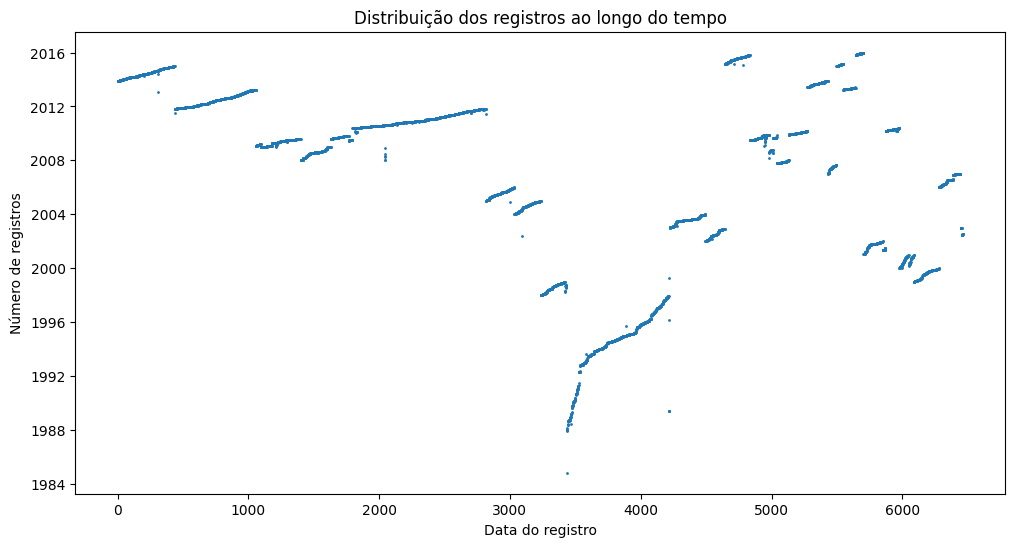

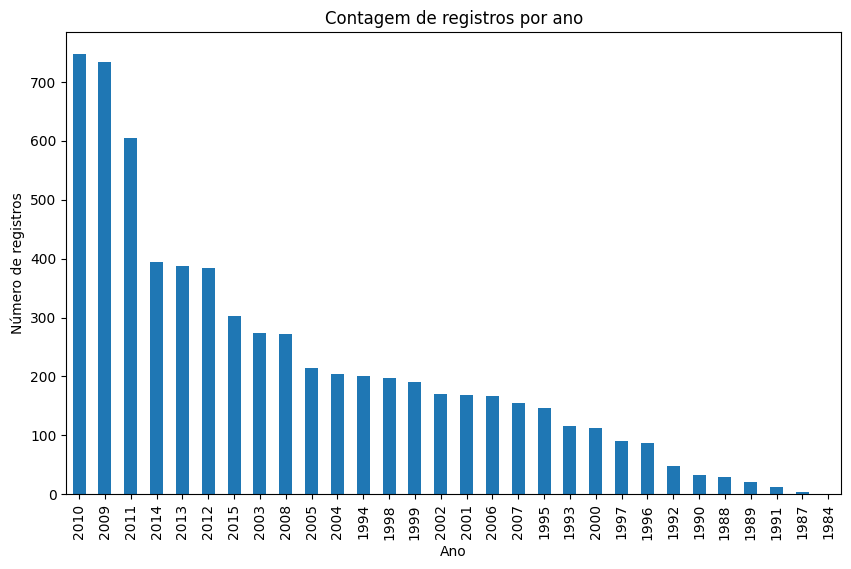

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('RegistroPernambuco.csv')

# Converter as colunas de data para o formato de data/hora
df['Data do registro'] = pd.to_datetime(df['Data do registro'])
df['Data do evento'] = pd.to_datetime(df['Data do evento'], errors='coerce')
df['Data de Carencia'] = pd.to_datetime(df['Data de Carencia'], errors='coerce')

# Visualizar a distribuição dos registros ao longo do tempo
plt.figure(figsize=(12, 6))
plt.plot(df['Data do registro'], '.', markersize=2)
plt.xlabel('Data do registro')
plt.ylabel('Número de registros')
plt.title('Distribuição dos registros ao longo do tempo')
plt.show()

# Contagem de registros por ano
df['Ano do registro'] = df['Data do registro'].dt.year
contagem_por_ano = df['Ano do registro'].value_counts()

# Gráfico de barras para visualizar a contagem de registros por ano
plt.figure(figsize=(10, 6))
contagem_por_ano.plot(kind='bar')
plt.xlabel('Ano')
plt.ylabel('Número de registros')
plt.title('Contagem de registros por ano')
plt.show()


C:\Users\João Victor\AppData\Local\Temp\ipykernel_15324\2868894576.py:7: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Data do registro'] = pd.to_datetime(df['Data do registro'])


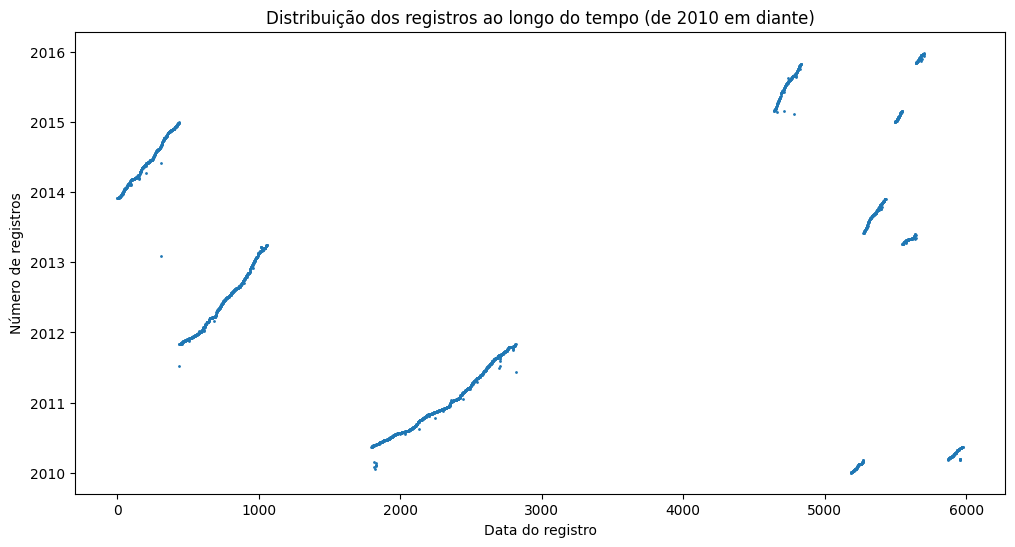

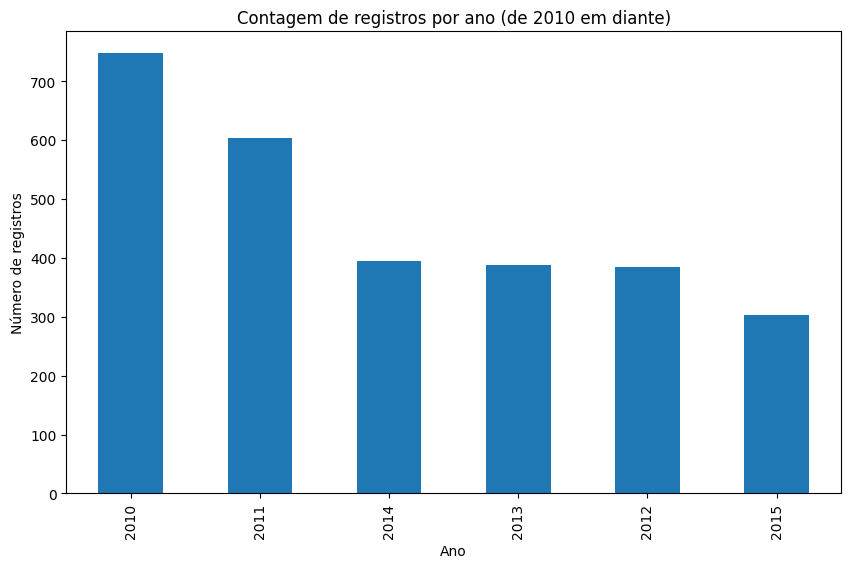

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('RegistroPernambuco.csv')

# Converter as colunas de data para o formato de data/hora
df['Data do registro'] = pd.to_datetime(df['Data do registro'])
df['Data do evento'] = pd.to_datetime(df['Data do evento'], errors='coerce')
df['Data de Carencia'] = pd.to_datetime(df['Data de Carencia'], errors='coerce')

# Filtrar registros a partir de 2010
df = df[df['Data do registro'].dt.year >= 2010]

# Visualizar a distribuição dos registros ao longo do tempo
plt.figure(figsize=(12, 6))
plt.plot(df['Data do registro'], '.', markersize=2)
plt.xlabel('Data do registro')
plt.ylabel('Número de registros')
plt.title('Distribuição dos registros ao longo do tempo (de 2010 em diante)')
plt.show()

# Contagem de registros por ano
df['Ano do registro'] = df['Data do registro'].dt.year
contagem_por_ano = df['Ano do registro'].value_counts()

# Gráfico de barras para visualizar a contagem de registros por ano
plt.figure(figsize=(10, 6))
contagem_por_ano.plot(kind='bar')
plt.xlabel('Ano')
plt.ylabel('Número de registros')
plt.title('Contagem de registros por ano (de 2010 em diante)')
plt.show()


C:\Users\João Victor\AppData\Local\Temp\ipykernel_15324\1909481659.py:7: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Data do registro'] = pd.to_datetime(df['Data do registro'])


<Figure size 1200x600 with 0 Axes>

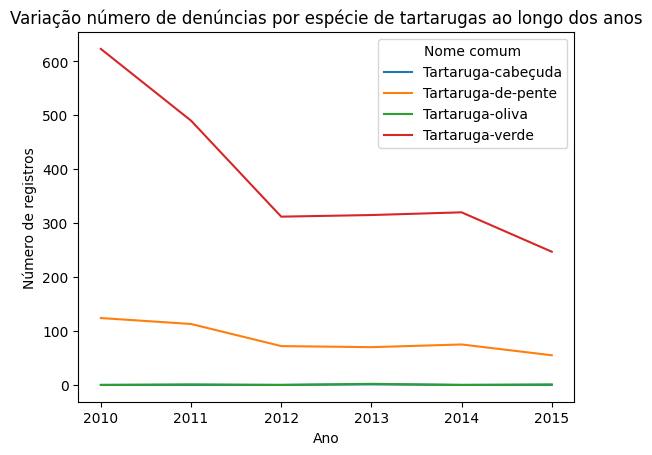

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('RegistroPernambuco.csv')

# Converter as colunas de data para o formato de data/hora
df['Data do registro'] = pd.to_datetime(df['Data do registro'])
df['Data do evento'] = pd.to_datetime(df['Data do evento'], errors='coerce')
df['Data de Carencia'] = pd.to_datetime(df['Data de Carencia'], errors='coerce')

# Filtrar registros a partir de 2010
df = df[df['Data do registro'].dt.year >= 2010]

# Criar uma tabela dinâmica para contar a ocorrência de cada nome comum em cada ano
tabela_pivot = pd.pivot_table(df, index='Nome comum', columns=df['Data do registro'].dt.year, aggfunc='size', fill_value=0)

# Plotar um gráfico de linhas para visualizar a variação dos nomes comuns ao longo dos anos
plt.figure(figsize=(12, 6))
tabela_pivot.T.plot(legend=True)
plt.xlabel('Ano')
plt.ylabel('Número de registros')
plt.title('Variação número de denúncias por espécie de tartarugas ao longo dos anos')
plt.show()

In [ ]:
import pandas as pd
import plotly.express as px

# Ler o arquivo CSV
a = pd.read_csv('RegistroPernambuco.csv', sep=',')

# Converter a coluna "Data do registro" para o tipo de dado de data
a['Data do registro'] = pd.to_datetime(a['Data do registro'], format='%d/%m/%Y')

# Filtrar registros com datas após 2012
a = a[a['Data do registro'].dt.year >= 2012]

# Extrair o ano e o mês da coluna "Data do registro"
a['Ano'] = a['Data do registro'].dt.year
a['Mes'] = a['Data do registro'].dt.month

# Mapear o número do mês para a sigla do mês
meses_siglas = {
    1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Abr', 5: 'Mai', 6: 'Jun',
    7: 'Jul', 8: 'Ago', 9: 'Set', 10: 'Out', 11: 'Nov', 12: 'Dez'
}
a['Sigla Mes'] = a['Mes'].map(meses_siglas)

# Agrupar os dados por ano, mês, espécies de tartarugas e "nome comum" e contar o número de denúncias em cada grupo
contagem_por_ano_mes_especie_nome_comum = a.groupby(['Ano', 'Sigla Mes', 'Nome cientifico na base de dados', 'Nome comum']).size().reset_index(name='Contagem')

# Criar gráficos separados para cada ano
for ano in contagem_por_ano_mes_especie_nome_comum['Ano'].unique():
    data_ano = contagem_por_ano_mes_especie_nome_comum[contagem_por_ano_mes_especie_nome_comum['Ano'] == ano]
    fig = px.bar(data_ano, x='Sigla Mes', y='Contagem', color='Nome comum', text='Contagem',
                 category_orders={"Sigla Mes": ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']})

    # Configurações adicionais do layout do gráfico
    fig.update_layout(title=f'Número de Denúncias por Mês por Espécie de Tartaruga do Estado de Pernambuco ({ano})',
                      xaxis_title='Mês',
                      yaxis_title='Número de Denúncias',
                      legend_title='Nome Comum')

    # Ajustar a posição do texto dos valores para sempre aparecer na horizontal em cima de cada barra
    fig.update_traces(texttemplate='%{text}', textposition='outside')

    # Exibir o gráfico interativo
    fig.show()


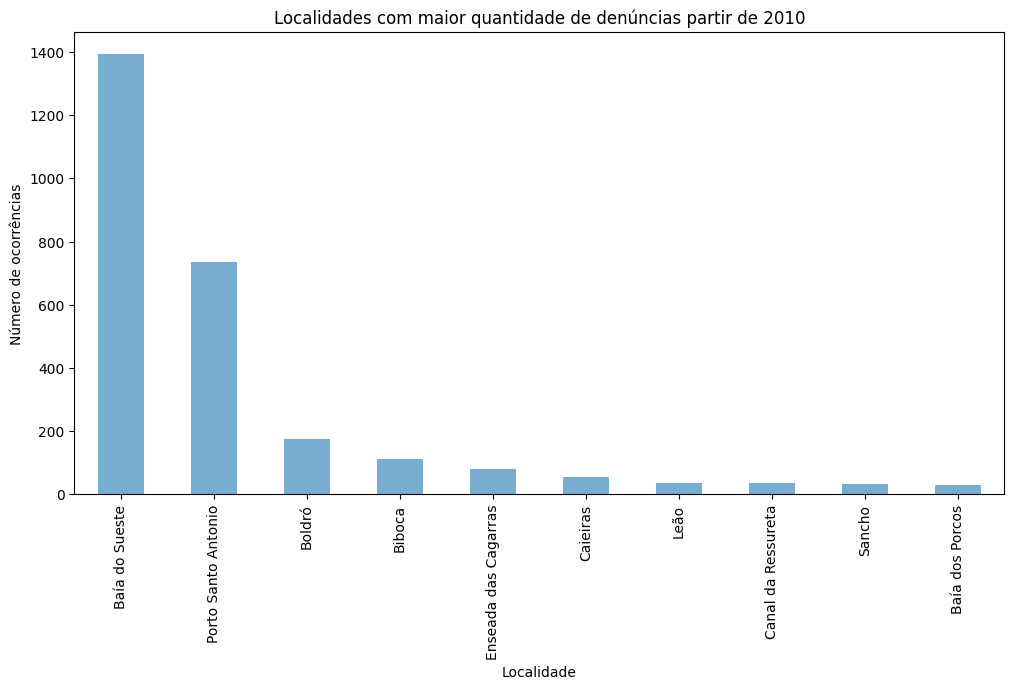

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('RegistroPernambuco.csv')

# Converter a coluna de data para o formato correto de data/hora
df['Data do registro'] = pd.to_datetime(df['Data do registro'], format='%d/%m/%Y')

# Filtrar registros a partir de 2010
df = df[df['Data do registro'].dt.year >= 2010]

# Contagem de ocorrências de cada localidade
contagem_localidades = df['Localidade'].value_counts()

# Selecionar as 10 localidades mais ocorridas
localidades_mais_ocorridas = contagem_localidades.nlargest(10)

# Criar o gráfico de barras com as localidades mais ocorridas
plt.figure(figsize=(12, 6))
localidades_mais_ocorridas.plot(kind='bar', alpha=0.6)
plt.xlabel('Localidade')
plt.ylabel('Número de ocorrências')
plt.title('Localidades com maior quantidade de denúncias partir de 2010')
plt.show()
